# Лабораторная работа № 1
## Дискретизация аналоговых сигналов
### Выполнил студент ФРКТ группы Б01 - 908
### Зайцев Василий


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# Task 0 (Введение в Python)

## Task 0.1

In [2]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
%matplotlib notebook

## Task 0.2

In [3]:
x=np.array([1,3,5,7,9])
x

array([1, 3, 5, 7, 9])

In [4]:
y=np.arange(start=1, stop=11, step=2)
y

array([1, 3, 5, 7, 9])

In [5]:
x=np.linspace(start=1, stop=9, num=5)
x

array([1., 3., 5., 7., 9.])

## Task 0.3

In [6]:
x=np.arange(100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Task 0.4

In [7]:
k = np.arange(10)
x = np.sin(2*np.pi*0.07*k)
x

array([ 0.        ,  0.42577929,  0.77051324,  0.96858316,  0.98228725,
        0.80901699,  0.48175367,  0.06279052, -0.36812455, -0.72896863])

## Task 0.5

In [8]:
import matplotlib.pyplot as plt

## Task 0.6, 0.7

<IPython.core.display.Javascript object>


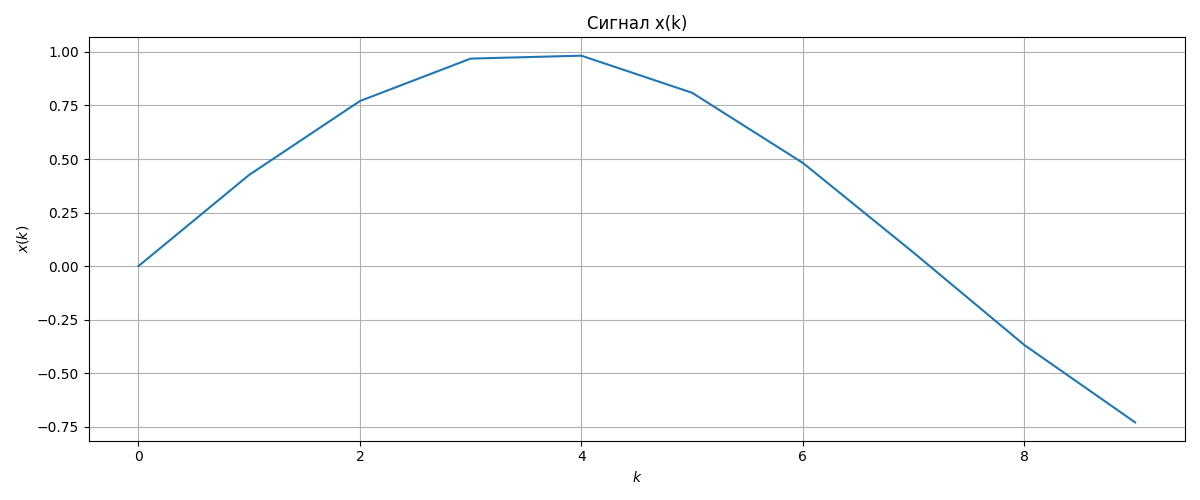

In [9]:
k = np.arange(10)
x = np.sin(2*np.pi*0.07*k)
x

plt.figure(figsize=[12, 5], dpi=100)
plt.plot(k, x)
plt.xlabel("$k$")
plt.ylabel("$x(k)$")
plt.title("Сигнал x(k)")
plt.grid()
plt.show()
plt.tight_layout()   

## Task 0.8

<IPython.core.display.Javascript object>


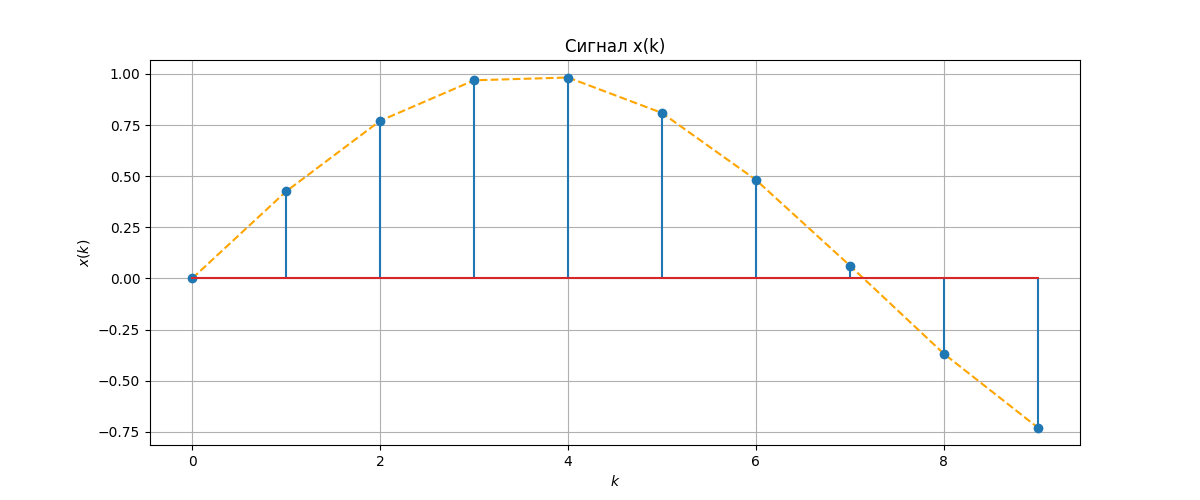

In [10]:
k = np.arange(10)
x = np.sin(2*np.pi*0.07*k)
x

plt.figure(figsize=[12, 5], dpi=100)
plt.plot(k, x,  color = 'orange', linestyle = '--')
plt.stem(k, x, use_line_collection=True)
plt.xlabel("$k$")
plt.ylabel("$x(k)$")
plt.title("Сигнал x(k)")
plt.grid()
plt.show()


## Task 0.9


<IPython.core.display.Javascript object>


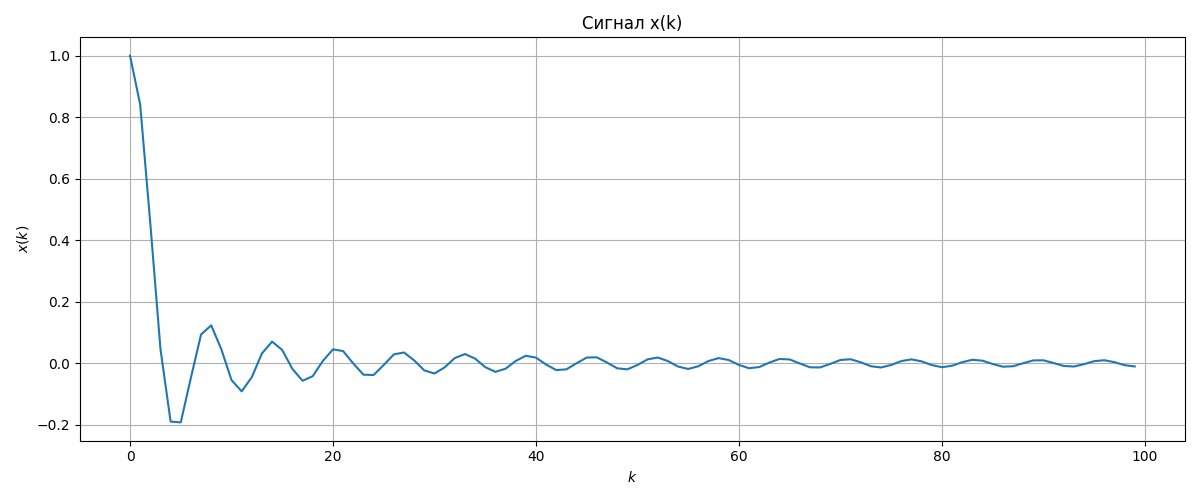

In [11]:
def my_sin(x):
    y = []
    for item in x:
        if (item == 0):
           y.append(1)
        else:
            y.append(np.sin(item)/item)
    return y
        
k = np.arange(100)
y = my_sin(k)


plt.figure(figsize=[12, 5], dpi=100)
plt.plot(k, y)
plt.xlabel("$k$")
plt.ylabel("$x(k)$")
plt.title("Сигнал x(k)")
plt.grid()
plt.show()
plt.tight_layout()


# Task 1

## Task 1.1 (Аналоговые и дискретизованные сигналы) (Вариант 5)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

<IPython.core.display.Javascript object>


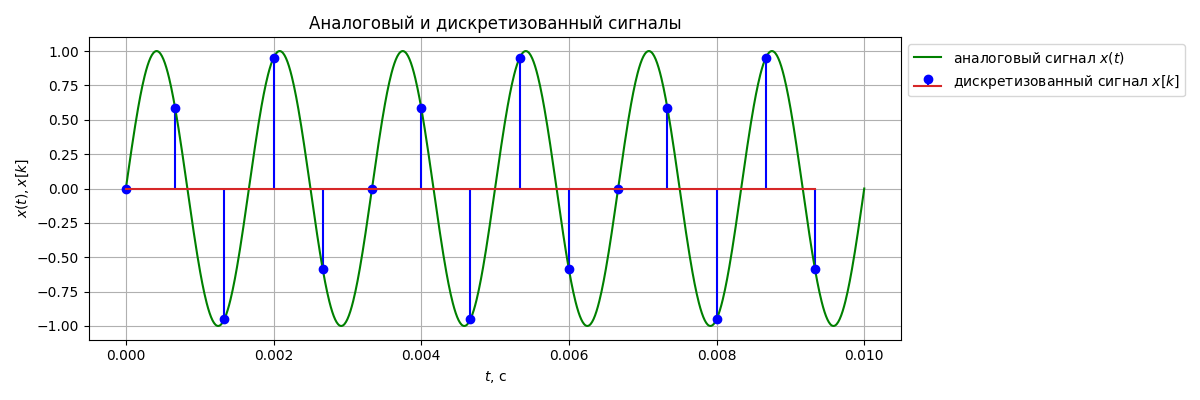

In [13]:
#Variant 5
N = 15
f0 = 600
fs = 1500
k=np.arange(N)
x=np.sin(2*np.pi*(f0/fs)*k)
num_levels=9

plt.figure(figsize=[12, 4])
t=np.linspace(0, N/fs, num=1024)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')
plt.grid() 
plt.xlabel("$t$, c")
plt.ylabel("$x(t), x[k]$")
plt.title("Аналоговый и дискретизованный сигналы")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()   

### Абсолютная ошибка квантования уменьшается с увеличением числа уровней квантования
### Расстояние между отсчетами обратно пропорционально зависит от частоты дискретизации



<IPython.core.display.Javascript object>


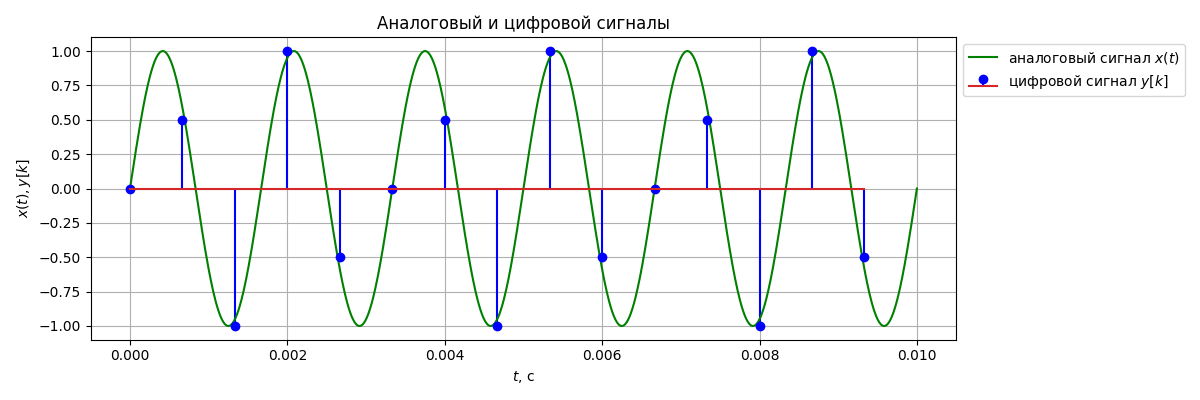

In [14]:
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

plt.figure(figsize=[12, 4])                 
t=np.linspace(0, N/fs, num=1024)          
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                            
                                          
                             
plt.yticks(bins)                      
plt.grid()                                 
plt.xlabel("$t$, c")                        
plt.ylabel("$x(t), y[k]$")                  
plt.title("Аналоговый и цифровой сигналы")  
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()  

<IPython.core.display.Javascript object>


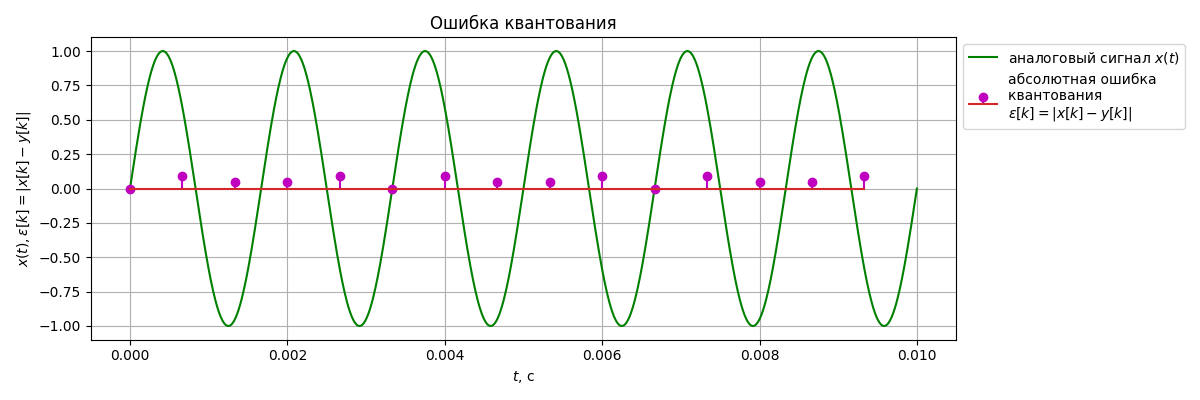

In [15]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                   
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                     
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")            
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

## Task 1.2 (Декодирование .wav файла) (Вариант 5)

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io.wavfile 
from IPython.display import Audio
Audio("tuning-fork.wav")

In [17]:
print("Аудиофайл tuning-fork.wav\n")
fs, x = scipy.io.wavfile.read("tuning-fork.wav")
print(f"Частота Дискретизации аудиофайла = {fs} Гц")
print(f"Битная глубина записи = 16 бит")
print(f"Число уровней квантования = {2**16}")
print(f"Число отсчетов ={x.size}, больше частоты дискретизации")
print(f"Длина записи в секундах  = {x.size/fs} с")
print(f"Размер файла в кб  = {x.size * 16 / 8 / 1024} Кб, реальный размер = 271.4 Кб")

Аудиофайл tuning-fork.wav

Частота Дискретизации аудиофайла = 44100 Гц
Битная глубина записи = 16 бит
Число уровней квантования = 65536
Число отсчетов =135680, больше частоты дискретизации
Длина записи в секундах  = 3.076643990929705 с
Размер файла в кб  = 265.0 Кб, реальный размер = 271.4 Кб


<IPython.core.display.Javascript object>


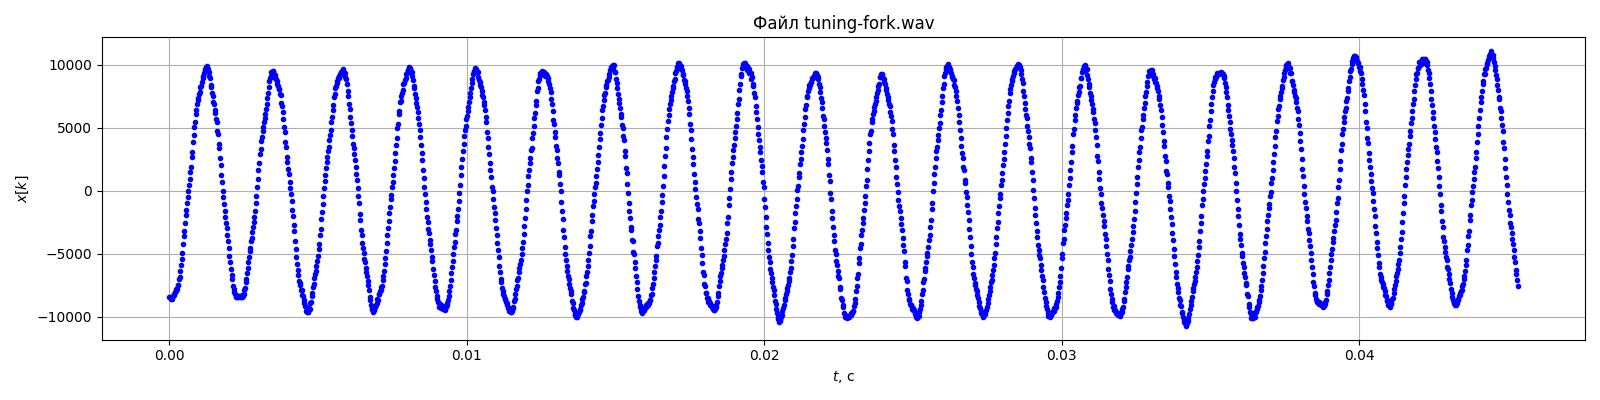

In [18]:
x1=x[8000:10000]
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков 
plt.figure(figsize=[16, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()   
plt.title("Файл tuning-fork.wav") 
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")             
plt.tight_layout()

# Task 2 (Спектры импульсных и периодических сигналов.)

In [19]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

## Task 2.1 Спектры симметричных оконных функций

<IPython.core.display.Javascript object>


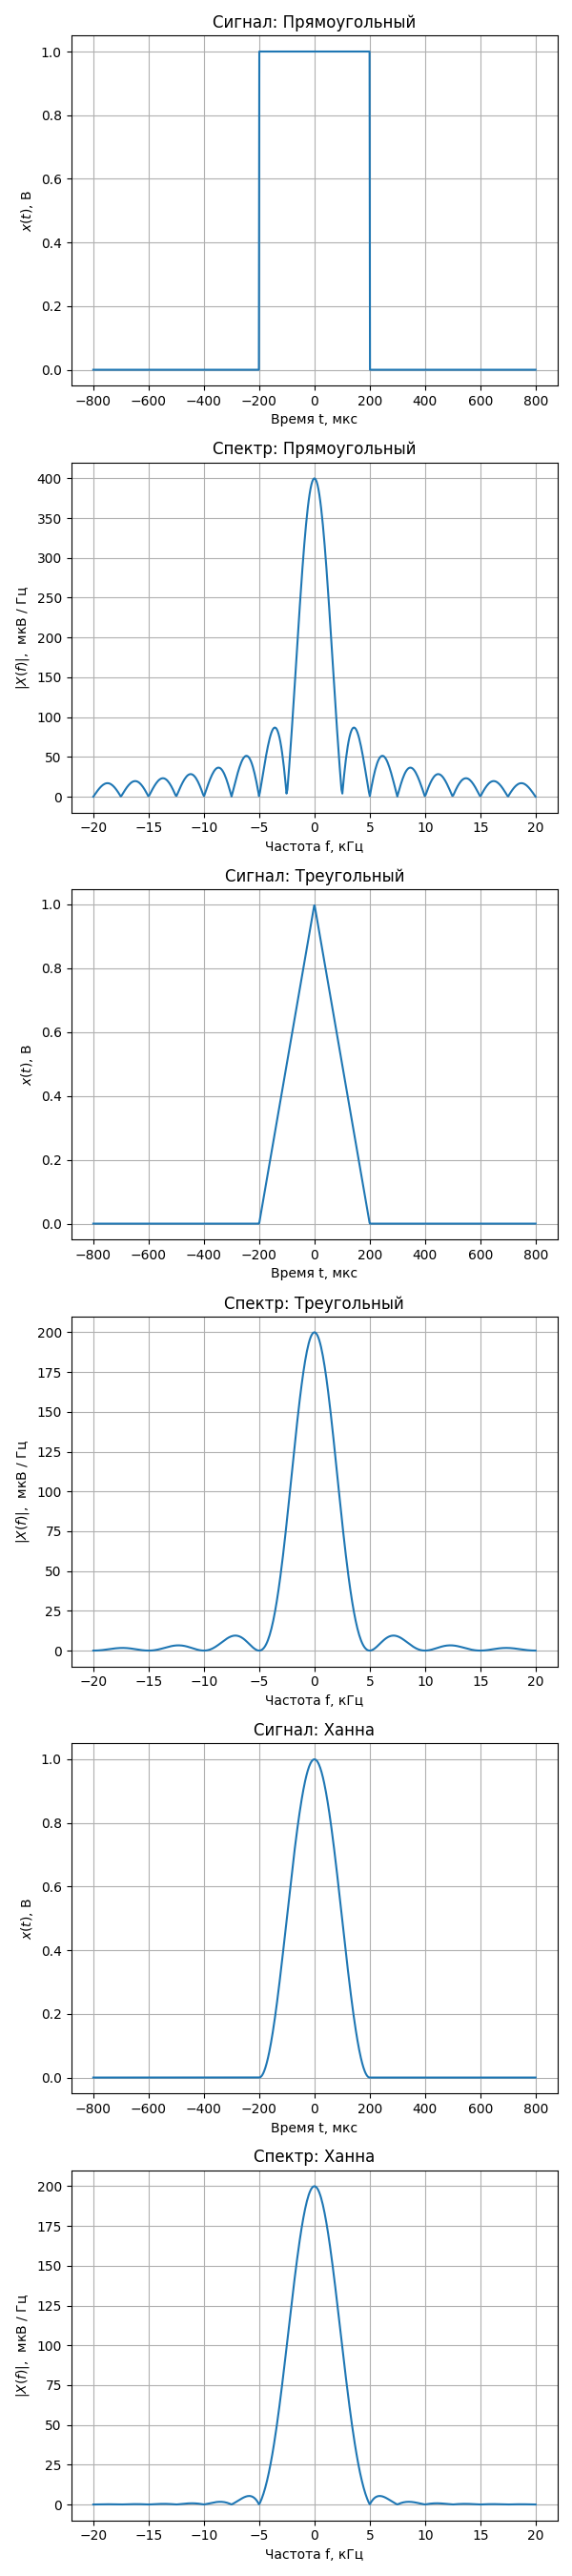

In [20]:
#Variant 5
tau=400e-6

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                
    else:
        return 0.0                 
def boxtriangle(t, tau):
    if abs(t)<tau/2:
        return 1.0 - 2.0 * np.abs(t) / tau                 
    else:
        return 0.0
def boxHann(t, tau):
    if abs(t)<tau/2:
        return 0.5 * (1.0 + np.cos(2.0 * np.pi * t / tau))                 
    else:
        return 0.0
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 27])
plt.subplot(6, 1, 1)
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал: Прямоугольный")
plt.tight_layout() 
plt.grid()

plt.subplot(6, 1, 2)
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр: Прямоугольный")
plt.tight_layout() 
plt.grid()

plt.subplot(6, 1, 3)
plt.plot(t_band*1e6, [boxtriangle(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал: Треугольный")
plt.tight_layout() 
plt.grid()

plt.subplot(6, 1, 4)
plt.plot(f_band/1e3, fourier_transform(signal=boxtriangle, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр: Треугольный")
plt.tight_layout() 
plt.grid()

plt.subplot(6, 1, 5)
plt.plot(t_band*1e6, [boxHann(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал: Ханна")
plt.tight_layout() 
plt.grid()

plt.subplot(6, 1, 6)
plt.plot(f_band/1e3, fourier_transform(signal=boxHann, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр: Ханна")
plt.tight_layout() 
plt.grid()


In [21]:
print(list(map(lambda z : 20 * np.log(z / 200), np.array([86, 9.4, 5.3]))))

[-16.87940140589058, -61.152153545441564, -72.61221091979921]


|  Окно  |  Уровень боковых лепестков мкВ/Гц | Ширина главного лепестка на нулевом уровне кГц |
|:-----------:|:---:|:---:|
| Прямоугольное | 86 | 5 |
| Треугольное  | 9.4 |10 |
| Ханна | 5.3 | 10 |

|  Окно  |  Уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ | Расположение нулей $|X(f)|$ (практич. и теоретическое) |
|:-----------:|:---:|:---:|
| Прямоугольное | -30.7 | 2.5 |
| Треугольное  | -61.1 | 5 |
| Ханна | -72.6 | 5 |

Расположение нулей (теоретическое),  
Прямоугольное : 1/tau/1000 = 2.5,  
Треугольное: 2/tau/1000 = 5,   
Ханна: 2/tau/1000 = 5

Прямоугольное окно
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$
Треугольноее окно
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$
Окно Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$

## Task 2.2 Теорема запаздывания для преобразования Фурье

<IPython.core.display.Javascript object>


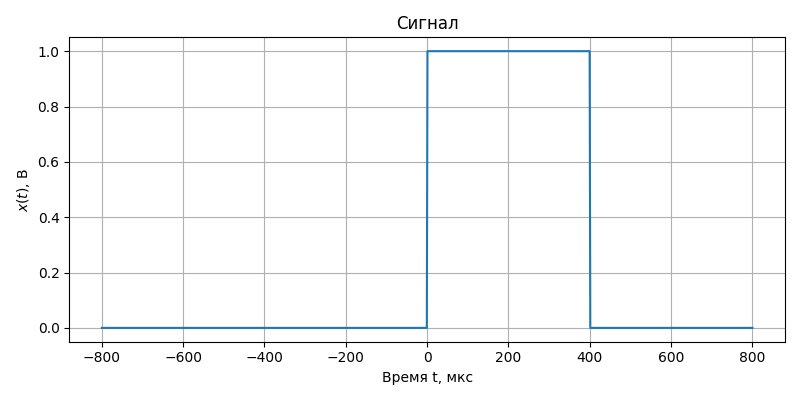

<IPython.core.display.Javascript object>


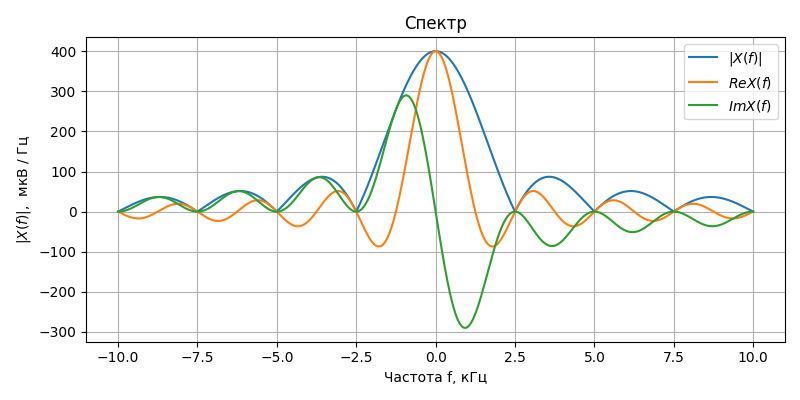

In [22]:
#Variant 5
tau=400*1e-6 #400 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 1 # 0.1 В
    else:
        return 0.0 # 0 В
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$')
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

Из теоремы запаздывания: при изменении начала отсчёта, спектр не менятся по амплитуде. Происходит только сдвиг фаз.


## Task 2.3 Спектр отрезка синусоиды

/tmp/ipykernel_57945/3768143031.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[6, 4])


<IPython.core.display.Javascript object>


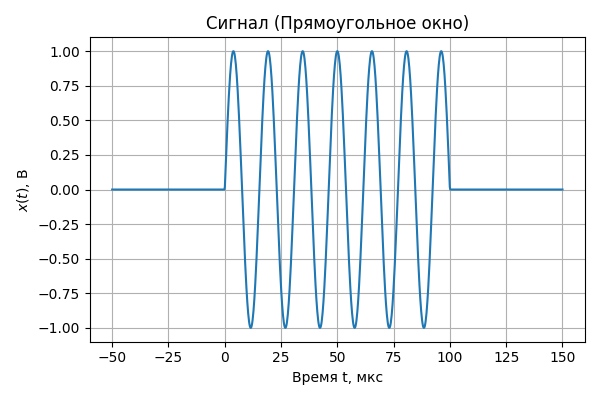

<IPython.core.display.Javascript object>


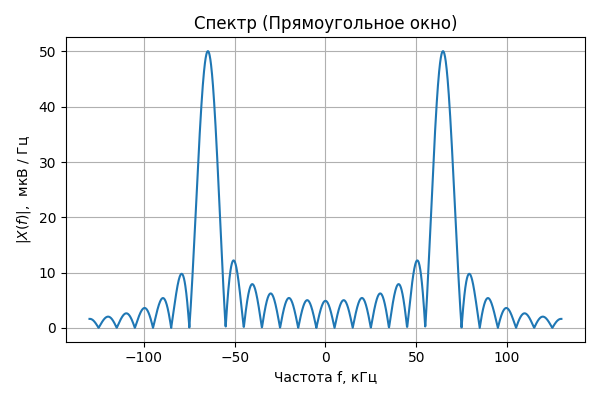

<IPython.core.display.Javascript object>


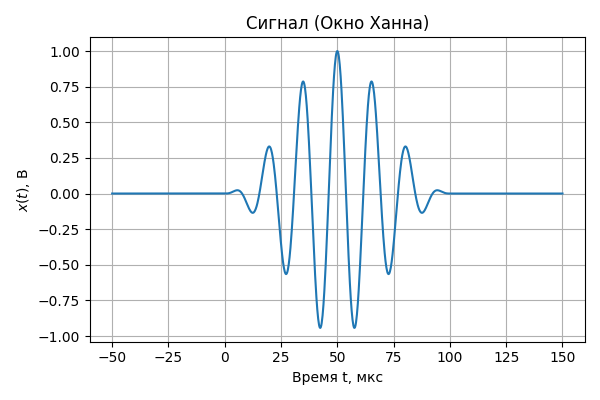

<IPython.core.display.Javascript object>


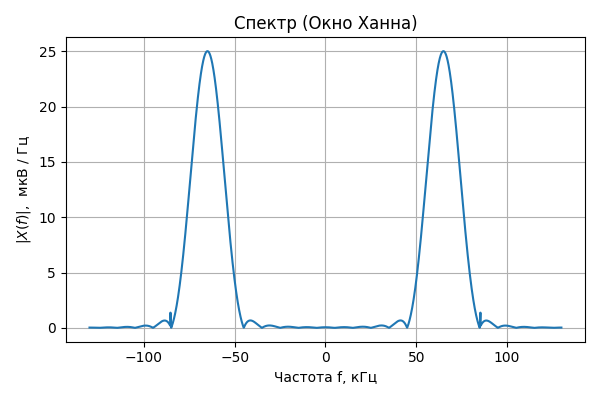

In [35]:
#Variant 5
f0=65e3      # 65 кГц
tau=100*1e-6     # 50  мкс

# случай прямоугольного окна
def sin_with_boxcar(t, tau):                            
    if 0<=t<=tau:
        return np.sin(2*np.pi*f0*t) 
    return 0.0

# случай окна Ханна
def sin_with_Hann(t, tau):
    if 0<=t<=tau: 
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    return 0.0
    
f_band=np.linspace(-2*f0, 2*f0, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band])
plt.title("Сигнал (Прямоугольное окно)")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (Прямоугольное окно)")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [sin_with_Hann(t, tau) for t in t_band])
plt.title("Сигнал (Окно Ханна)")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_Hann, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6)
plt.title("Спектр (Окно Ханна)")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

1) $f= 65 * 10^3 Гц$ и положение главных максимумов $\pm{} 65 * 10^3 Гц$, что соответствует частоте.

2) Для синусоиды, взвешанной окном Ханна стороны положиение главных спектральных максимумов на  $\pm{}$ 65 кГц, что соотвествует  $f$

* Для прямоугольного: $|X(f)| \approx 50мкВ/кГц$ и ширина главного лепестка $20кГц$
* Для окна Ханна: $|X(f)| \approx 25мкВ/кГц$ и ширина главного лепестка $40кГц$

3) Как видно, с окном Ханна все дополнительный экстремумы ушли, остались главные на тех же местах, только с чуть уменьшенной амплитудой. В спектре бесконечного синусоидального сигнала было бы 2 одиноких столбика, но вследствии наложения оконной функции происходит растекание спектральных компонент.

## Task 2.4 Спектр пачки равноотстоящих импульсов

<IPython.core.display.Javascript object>


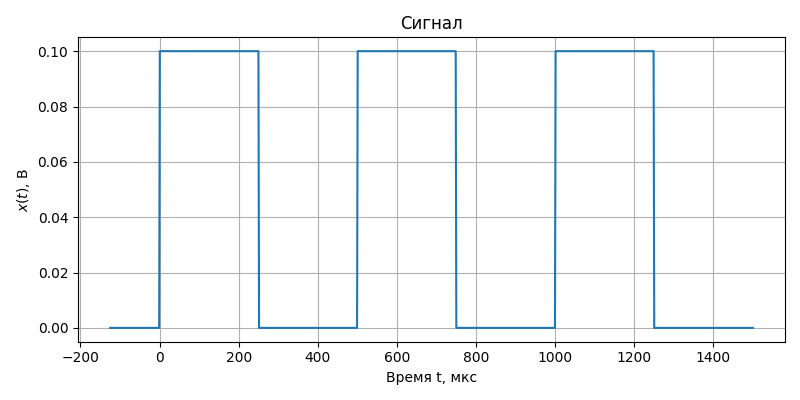

<IPython.core.display.Javascript object>


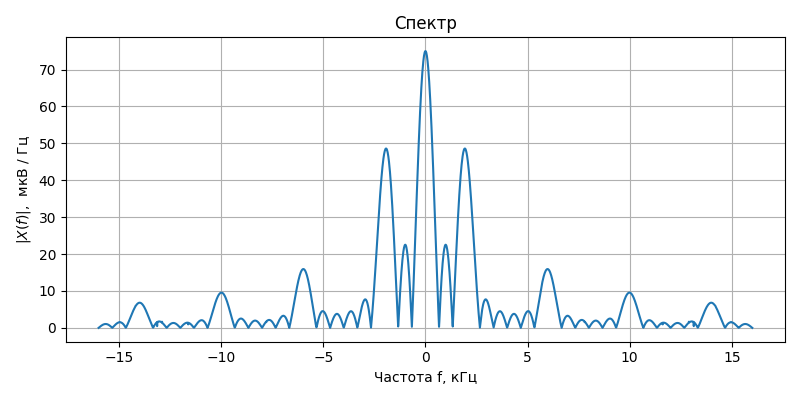

/tmp/ipykernel_57945/1737207653.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
/tmp/ipykernel_57945/1737207653.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


In [26]:
#Variant 5
N=3
tau=250e-6 
period = 500e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

<IPython.core.display.Javascript object>


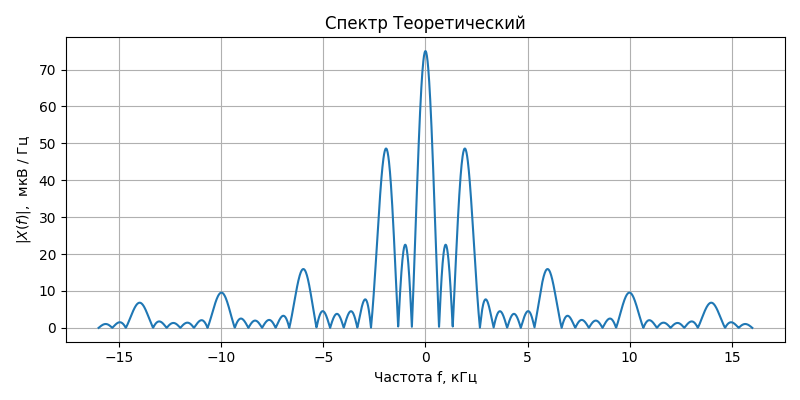

In [27]:
#Theoretical Fourier Transform
#abs(Exp(jwt)) = 1, formula was given in instruction

def X(f):
    return 0.1 * tau * np.sin(np.pi * tau * f) / (np.pi * tau * f) * np.sin(np.pi * N * period * f) / np.sin(np.pi * period * f)

f_band=np.linspace(-4/tau, 4/tau, 2000)


plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, abs(X(f_band)) * 1e6)
plt.title("Спектр Теоретический")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

График спектра совпадает с теоретическим рассчетом - Круто!

# Task 3 Эффект наложения спектров при дискретизации сигналов.

In [28]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

## Task 3.1 Эффект наложения при дискретизации прямоугольного импульса

In [29]:
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

<IPython.core.display.Javascript object>


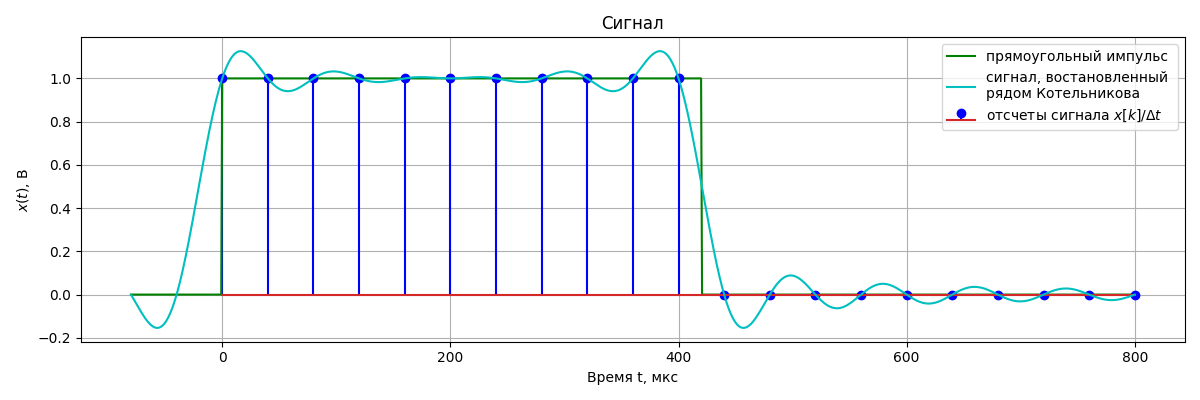

<IPython.core.display.Javascript object>


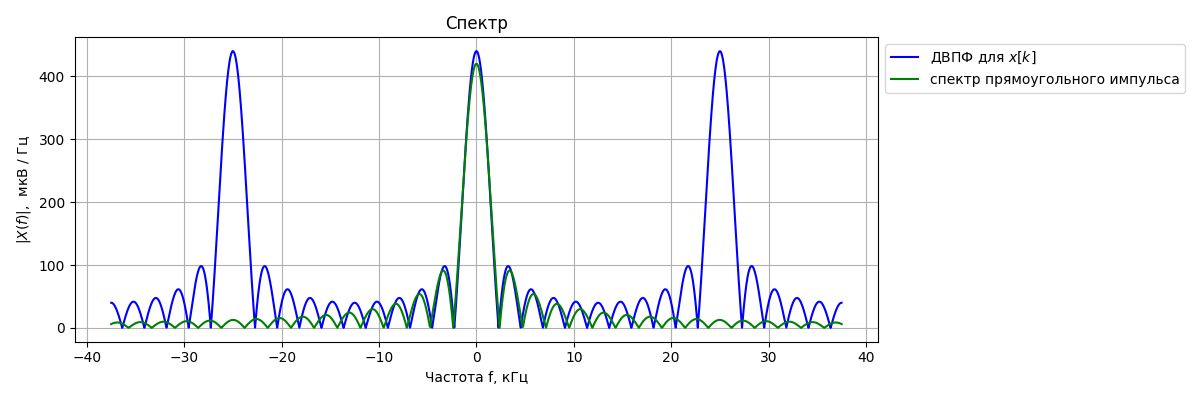

/tmp/ipykernel_57945/1737207653.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
/tmp/ipykernel_57945/1737207653.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


In [30]:
# Variant 5
tau=400*1e-6 #400 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    #print([xk*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])
    


tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[12, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр прямоугольного импульса')

plt.title("Спектр")
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

Отчетливо видно наложение спектра

In [31]:
print(f"Частота дискретизации равна, {fs}.")
print(f"Отсюда, наложение может наблюдаться для спектров шириной больше  fs/2 = 12500 Гц")

Частота дискретизации равна, 25000.000000000004.
Отсюда, наложение может наблюдаться для спектров шириной больше  fs/2 = 12500 Гц


<IPython.core.display.Javascript object>


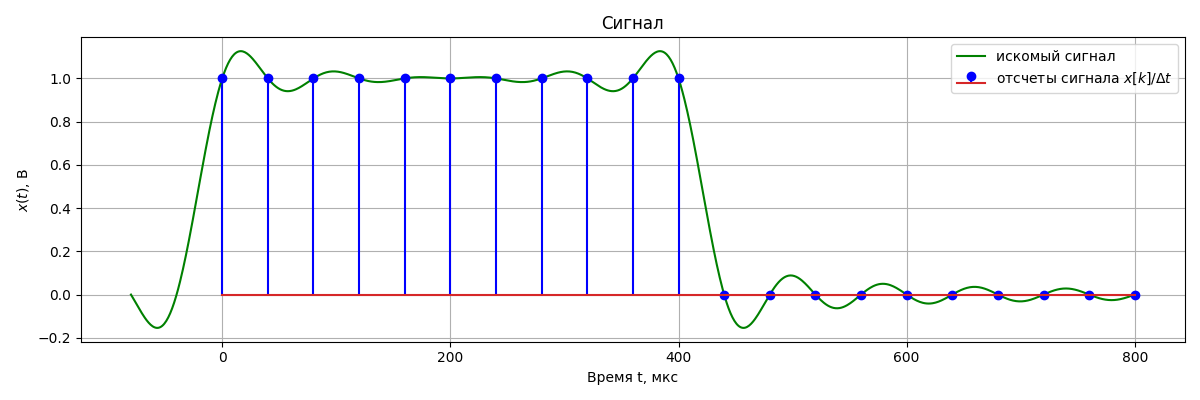

/tmp/ipykernel_57945/484401523.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[12, 4])


<IPython.core.display.Javascript object>


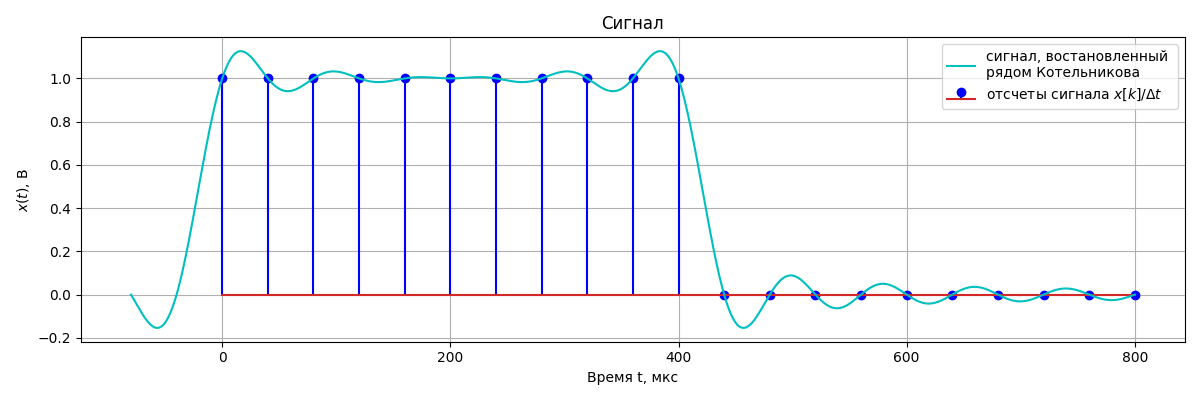

In [32]:
sig = np.array([sinc_interp(t, xk) for t in t_band])

t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.plot(t_band*1e6, sig, 'g', label='искомый сигнал')
plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')

plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.stem(tk*1e6, xk*fs, 'b', 'bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')
plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

## Task 3.2 Эффект наложения при прореживании сигнала

<IPython.core.display.Javascript object>


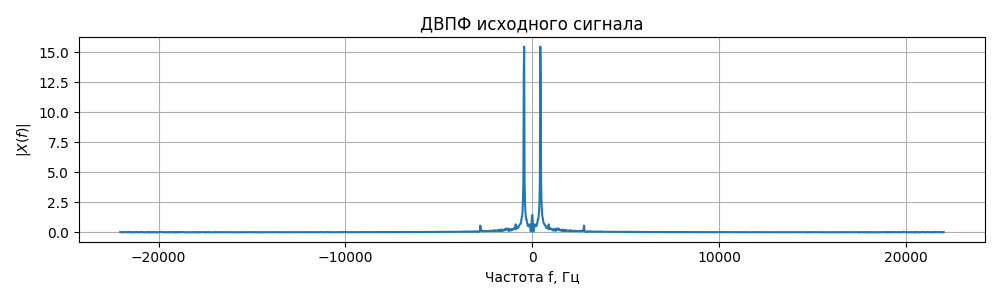

<IPython.core.display.Javascript object>


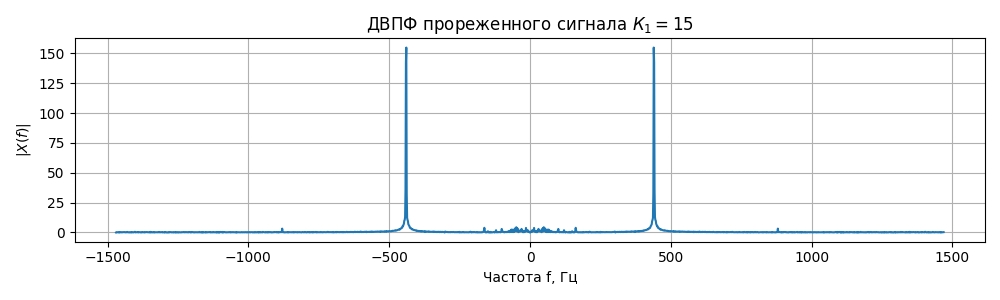

<IPython.core.display.Javascript object>


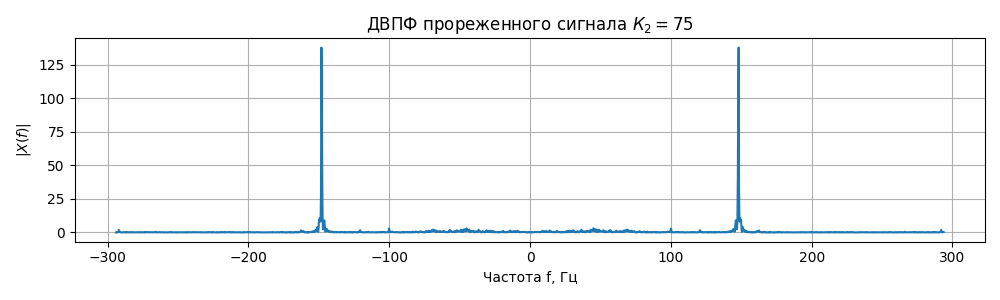

In [33]:
#Variant 5
#f0 = 440 Hz
#fs = 44100 Hz
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy import signal

fs, x=scipy.io.wavfile.read('tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

def DTFT_abs(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 


plt.figure(figsize=[10, 3], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K = 15
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end 
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=75
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end
    
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_2=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

Взятие К-ого сигнала уменьшает частоту дискретизации в К раз.



Подсчитаем частоту дискретизации в К1 : fs = 44100 / 15 = 2940 > f0 * 2
Значит, в случае К1 преобразование удовлетворяет условию Котельникова. Пики на 440 гц остались на месте.

Подсчитаем частоту дискретизации в К1 : fs = 44100 / 75 = 588 < f0 * 2
Значит, в случае К2 преобразование не  удовлетворяет условию Котельникова. Спектр дискретизованного сигнала подвержен элайзингу, а спектральные пики сдвинуты в ~140 Гц

In [61]:
44100 / (440 * 2)

50.11363636363637

<IPython.core.display.Javascript object>


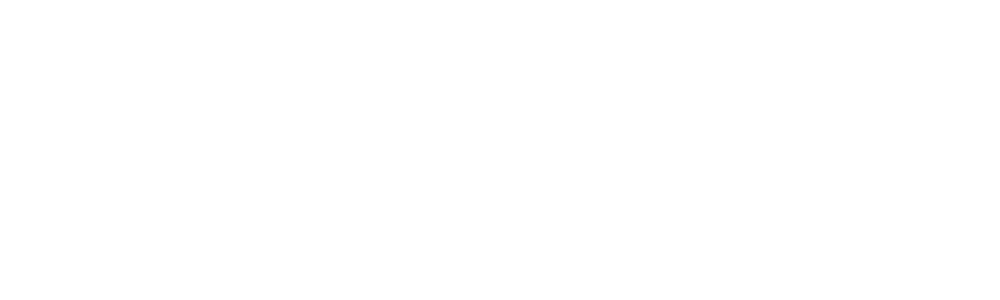

<IPython.core.display.Javascript object>


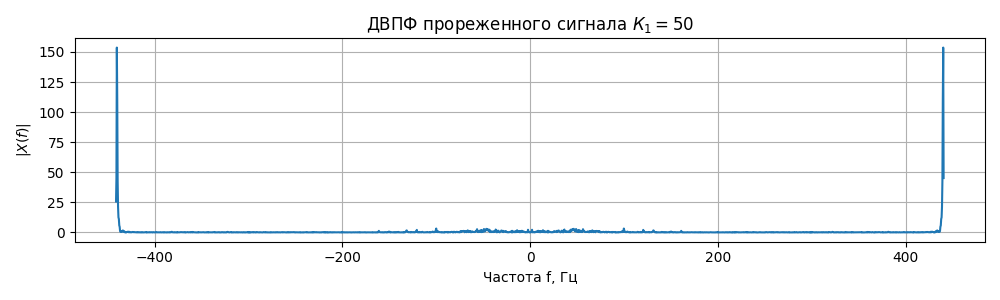

<IPython.core.display.Javascript object>


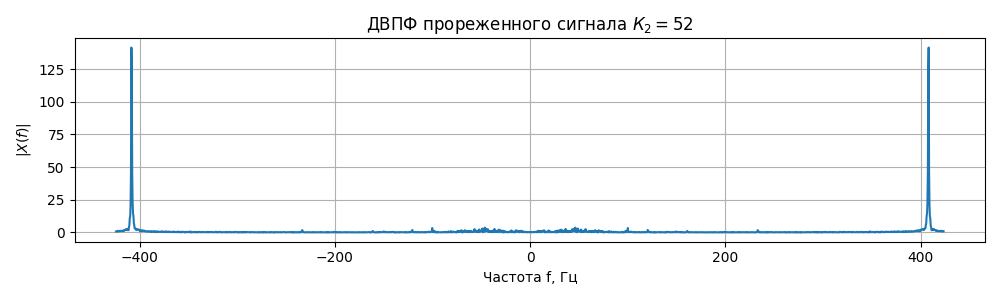

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from scipy import signal

fs, x=scipy.io.wavfile.read('tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

def DTFT_abs(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 


plt.figure(figsize=[10, 3], dpi=100)
# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K = 50
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end 
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 3], dpi=100)
K=52
y=np.zeros(x.size//K+1)

u=0
for xk in np.arange(0, x.size, K):
    y[u]=x[xk]/K
    u=u+1
# end
    
DFTF_plot=DTFT_abs(y/(fs/K), fs/K)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_2=$%i" %K)
plt.xlabel("Частота f, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 